In [39]:
%pylab inline
import skimage.io
from scipy.ndimage.morphology import binary_erosion, binary_dilation, binary_closing, binary_opening
from skimage.morphology import opening, closing, dilation, erosion

Populating the interactive namespace from numpy and matplotlib


# Лаб №5

Дата сдачи: 17-10-2016 00:00 MSK UTC+3

### 5. Порядко-статистические фильтры

Разработать программу, иллюстрирующую результаты применения порядково-статистичеких фильтров для бинарных и полутоновых изображений для квадратных окон размера 3x3, 5x5, 7x7.

Содержание отчета:

- Исходные изображения
- Код программы
- Результат работы программы

In [69]:
def fancy_show(imgs, *, n_cols=None, fig_dim=None):
    if type(imgs) == numpy.ndarray:
        imgs = [imgs]
    if len(imgs) == 1:
        n_rows = 1
        n_cols = 1
        if fig_dim == None:
            fig_dim = 5
        figsize = (fig_dim, fig_dim)
    else:
        if n_cols == None:
            n_cols = min(len(imgs), 3)
        n_rows = int(ceil(len(imgs) / n_cols))
        if fig_dim == None:
            fig_dim = 15
    figsize = (fig_dim, fig_dim / n_cols * n_rows)
    fig = plt.figure(figsize=figsize)
    for i, img in enumerate(imgs):
        ax = fig.add_subplot(n_rows, n_cols, i + 1)
        ax.imshow(img, cmap='gray', interpolation='none')

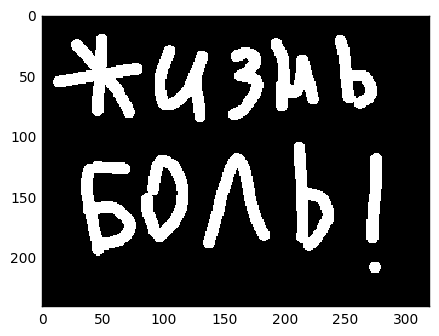

In [74]:
img = (imread('not-convex.png') > 0.5)[::2, ::2]
if len(img.shape) == 3:
    img = img[:, :, 0]
fancy_show(img)

In [93]:
def kth_stat_bin(img, r, k):
    result = np.zeros_like(img)
    img = pad(img, r, "constant")
    for i in range(r, img.shape[0] - r):
        for j in range(r, img.shape[1] - r):
            result[i - r][j - r] = np.sum(img[i - r: i + r + 1, j - r: j + r + 1]) >= k - 1
    return result

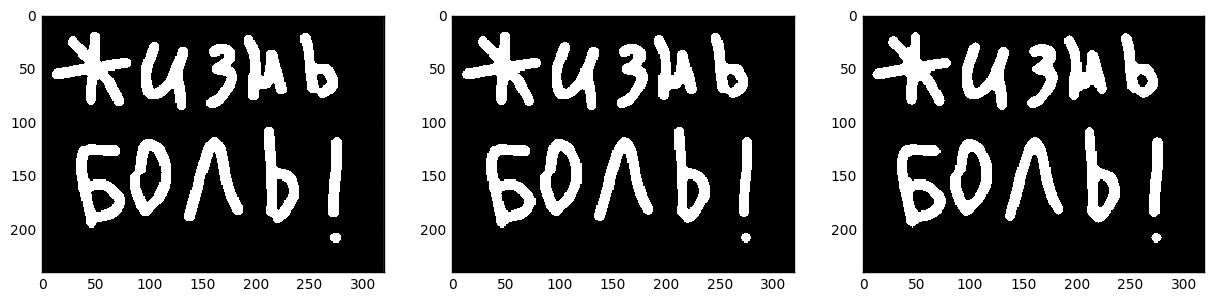

In [91]:
img_3 = kth_stat_bin(img, 1, 5)
img_5 = kth_stat_bin(img, 2, 13)
img_7 = kth_stat_bin(img, 3, 25)

fancy_show([img_3, img_5, img_7])

In [97]:
def kth_stat_gray(img, r, k):
    result = np.zeros_like(img)
    img = pad(img, r, "constant")
    for i in range(r, img.shape[0] - r):
        for j in range(r, img.shape[1] - r):
            result[i - r][j - r] = sorted((img[i - r: i + r + 1, j - r: j + r + 1]).flatten())[k - 1]
    return result

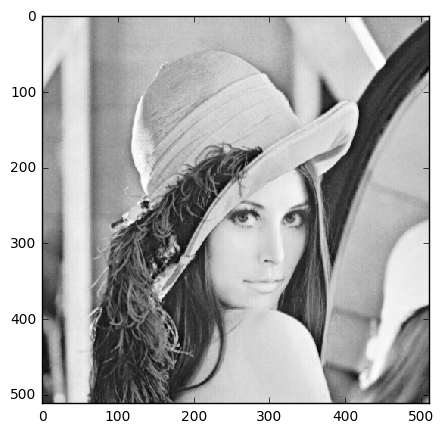

In [99]:
img_gray = imread('lenna.png')[:, :, 0]
fancy_show(img_gray)

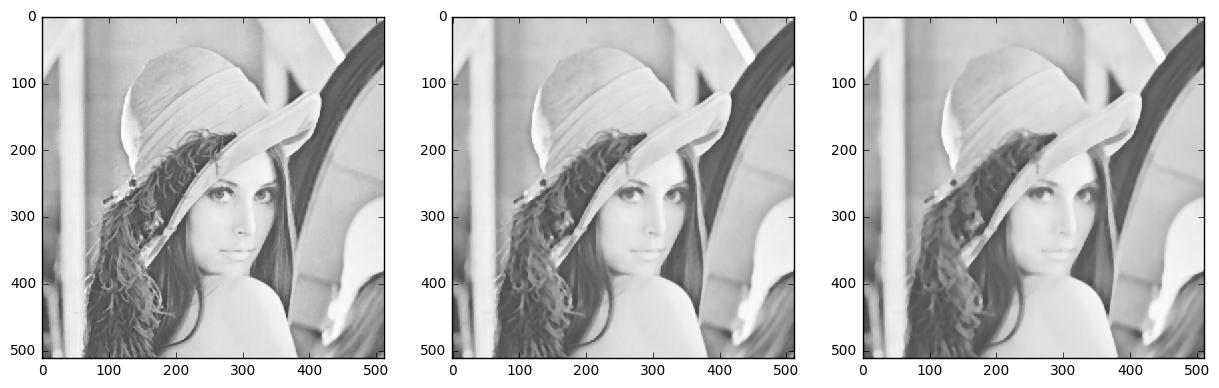

In [101]:
img_gray_3 = kth_stat_gray(img_gray, 1, 5)
img_gray_5 = kth_stat_gray(img_gray, 2, 13)
img_gray_7 = kth_stat_gray(img_gray, 3, 25)

fancy_show([img_gray_3, img_gray_5, img_gray_7])